# CAPSTONE PROJECT: Mobile Price Analysis & Prediction


Scrape Mobile Data from Amazon

In [17]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

url = "https://www.amazon.in/s?k=mobile+phones"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)",
    "Accept-Language": "en-US,en;q=0.9"
}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, "html.parser")
products = soup.find_all("div", {"data-component-type": "s-search-result"})

names, prices, ratings, rams, storages = [], [], [], [], []

for item in products:
    name = item.h2.text.strip() if item.h2 else "N/A"
    names.append(name)

    price_tag = item.find("span", class_="a-price-whole")
    prices.append(price_tag.text.replace(",", "") if price_tag else "0")

    rating_tag = item.find("span", class_="a-icon-alt")
    ratings.append(rating_tag.text.split()[0] if rating_tag else "0")

    ram_match = re.search(r"(\d+)\s*GB\s*RAM", name, re.IGNORECASE)
    storage_match = re.search(r"(\d+)\s*GB\s*(Storage|ROM)", name, re.IGNORECASE)

    rams.append(ram_match.group(1) + " GB" if ram_match else "N/A")
    storages.append(storage_match.group(1) + " GB" if storage_match else "N/A")

df = pd.DataFrame({
    "Name": names,
    "Price": pd.to_numeric(prices, errors="coerce"),
    "Rating": pd.to_numeric(ratings, errors="coerce"),
    "RAM": rams,
    "Storage": storages
})

df.head(10)


,Name,Price,Rating,RAM,Storage
0,"Samsung Galaxy M06 5G (Sage Green, 4GB RAM, 12...",7999,3.9,4 GB,128 GB
1,Apple iPhone 15 (128 GB) - Black,47999,4.5,N/A,N/A
2,"Samsung Galaxy M05 (Mint Green, 4GB RAM, 64 GB...",6249,4.0,4 GB,64 GB
3,"Redmi A4 5G (Starry Black, 4GB RAM, 64GB Stora...",7499,4.0,4 GB,64 GB
4,"Samsung Galaxy A55 5G (Awesome Navy, 8GB RAM, ...",23999,4.2,8 GB,128 GB
5,"Redmi 13 5G Prime Edition, Black Diamond, 8GB+...",10999,4.1,N/A,N/A
6,"Samsung Galaxy M06 5G (Blazing Black, 4GB RAM,...",7499,3.9,4 GB,64 GB
7,"Redmi 13 5G Prime Edition, Hawaiian Blue, 8GB+...",10999,4.1,N/A,N/A
8,"Redmi 13 5G Prime Edition, Orchid Pink, 8GB+12...",10999,4.1,N/A,N/A
9,"OnePlus Nord CE4 (Celadon Marble, 8GB RAM, 128...",18999,4.3,8 GB,128 GB


Clean RAM and Storage Columns

In [18]:
df["RAM"] = df["RAM"].str.replace(" GB", "").replace("N/A", "0").astype(int)
df["Storage"] = df["Storage"].str.replace(" GB", "").replace("N/A", "0").astype(int)
df = df[df["Price"] > 0]

In [19]:
# Check shape and summary
print("Shape of cleaned data:", df.shape)
print("\nSample rows:")
print(df.head(10))

print("\nMissing values:")
print(df.isnull().sum())


Shape of cleaned data: (22, 5)

Sample rows:
                                                Name  Price  Rating  RAM  \
0  Samsung Galaxy M06 5G (Sage Green, 4GB RAM, 12...   7999     3.9    4   
1                   Apple iPhone 15 (128 GB) - Black  47999     4.5    0   
2  Samsung Galaxy M05 (Mint Green, 4GB RAM, 64 GB...   6249     4.0    4   
3  Redmi A4 5G (Starry Black, 4GB RAM, 64GB Stora...   7499     4.0    4   
4  Samsung Galaxy A55 5G (Awesome Navy, 8GB RAM, ...  23999     4.2    8   
5  Redmi 13 5G Prime Edition, Black Diamond, 8GB+...  10999     4.1    0   
6  Samsung Galaxy M06 5G (Blazing Black, 4GB RAM,...   7499     3.9    4   
7  Redmi 13 5G Prime Edition, Hawaiian Blue, 8GB+...  10999     4.1    0   
8  Redmi 13 5G Prime Edition, Orchid Pink, 8GB+12...  10999     4.1    0   
9  OnePlus Nord CE4 (Celadon Marble, 8GB RAM, 128...  18999     4.3    8   

   Storage  
0      128  
1        0  
2       64  
3       64  
4      128  
5        0  
6       64  
7        0  
8

 Visualize Price and Rating Distributions

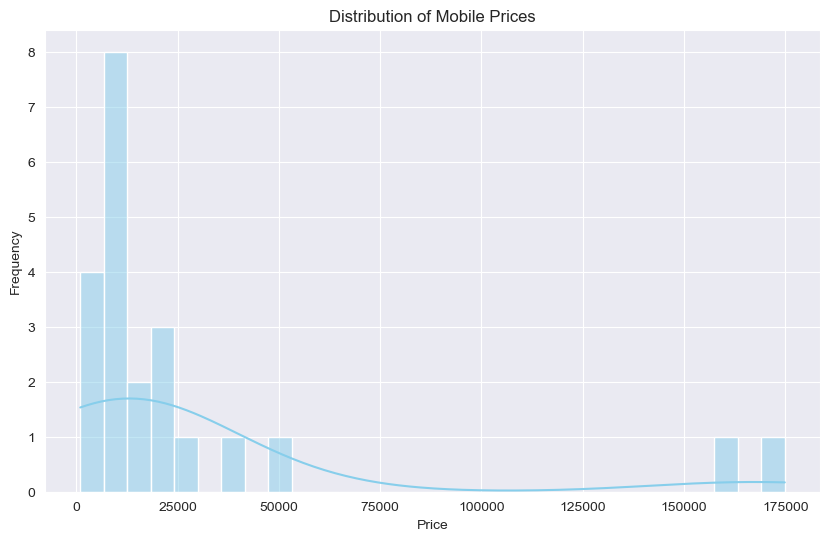

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Mobile Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

C:\Users\santh\AppData\Local\Temp\ipykernel_7788\1811786907.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Price_Category", y="Rating", data=df, palette="Set2")


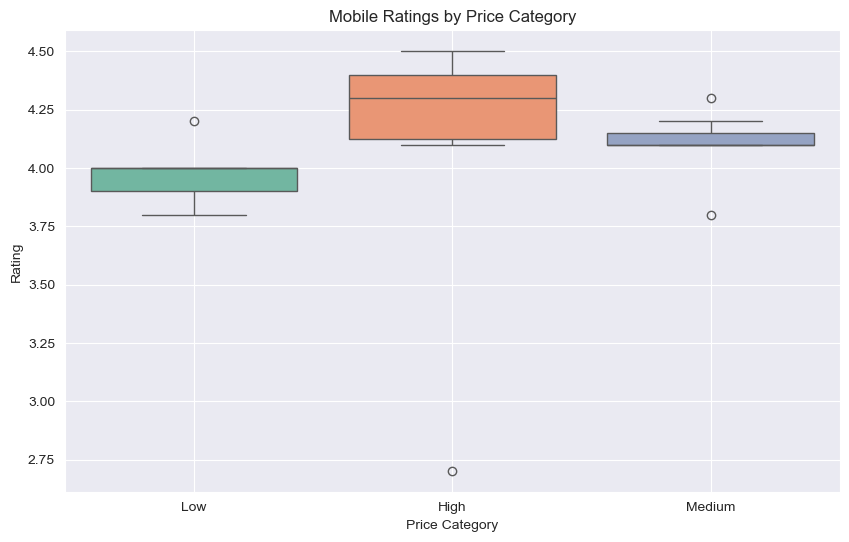

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns


# Create price category again if needed
def price_category(price):
    if price < 10000:
        return "Low"
    elif price < 20000:
        return "Medium"
    else:
        return "High"


df["Price_Category"] = df["Price"].apply(price_category)

plt.figure(figsize=(10, 6))
sns.boxplot(x="Price_Category", y="Rating", data=df, palette="Set2")
plt.title("Mobile Ratings by Price Category")
plt.xlabel("Price Category")
plt.ylabel("Rating")
plt.grid(True)
plt.show()


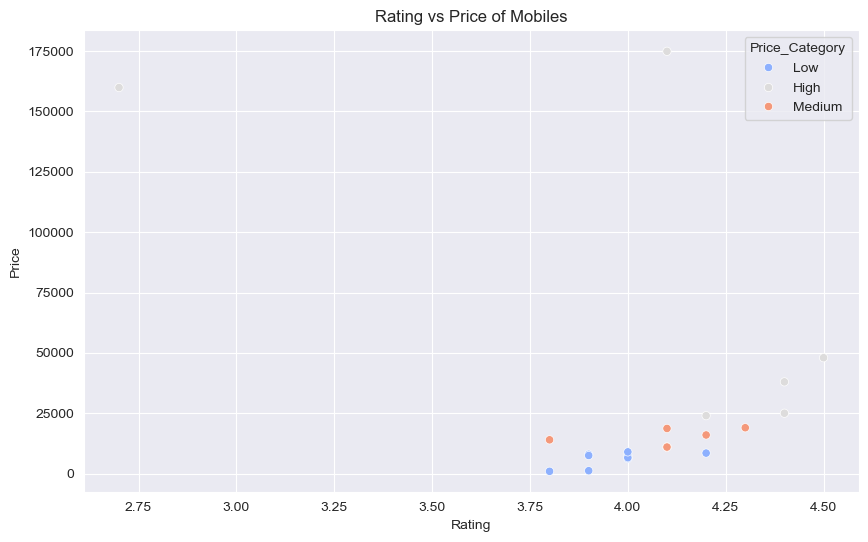

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Rating", y="Price", data=df, hue="Price_Category", palette="coolwarm")
plt.title("Rating vs Price of Mobiles")
plt.xlabel("Rating")
plt.ylabel("Price")
plt.grid(True)
plt.show()


 Cluster Mobiles Based on Specs


E:\Anaconda\envs\ml_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Anaconda\envs\ml_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Anaconda\envs\ml_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Anaconda\envs\ml_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows wi

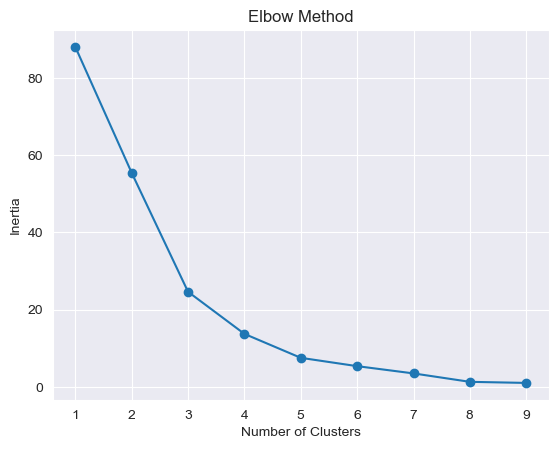

E:\Anaconda\envs\ml_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


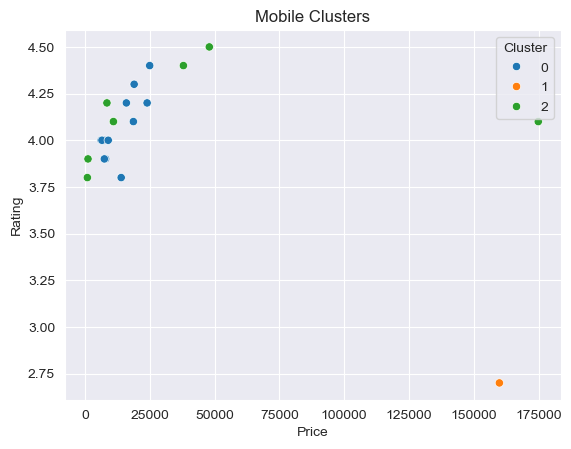

In [24]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = df[["Price", "Rating", "RAM", "Storage"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

kmeans = KMeans(n_clusters=3, random_state=0)
df["Cluster"] = kmeans.fit_predict(X_scaled)

sns.scatterplot(data=df, x="Price", y="Rating", hue="Cluster", palette="tab10")
plt.title("Mobile Clusters")
plt.show()


Classify Mobiles into Price Categories

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix


def price_category(price):
    if price < 10000:
        return "Low"
    elif price < 20000:
        return "Medium"
    else:
        return "High"


df["Price_Category"] = df["Price"].apply(price_category)

X = df[["RAM", "Storage", "Rating"]]
y = df["Price_Category"]

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

        High       0.00      0.00      0.00         3
         Low       0.33      0.50      0.40         2
      Medium       0.00      0.00      0.00         2

    accuracy                           0.14         7
   macro avg       0.11      0.17      0.13         7
weighted avg       0.10      0.14      0.11         7

Confusion Matrix:
 [[0 2 1]
 [0 1 1]
 [2 0 0]]


Predict Price from Specs using Regression

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.feature_extraction.text import TfidfVectorizer

df["Brand"] = df["Name"].str.extract(r'^(\w+)', expand=False)
df = pd.get_dummies(df, columns=["Brand"], drop_first=True)

tfidf = TfidfVectorizer(max_features=50)
X_tfidf = tfidf.fit_transform(df["Name"])
X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

X_combined = pd.concat([
    X_tfidf_df.reset_index(drop=True),
    df[["RAM", "Storage", "Rating"]].reset_index(drop=True)
], axis=1)

X_combined = X_combined.dropna()
y = df.loc[X_combined.index, "Price"]

X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor()
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


R² Score: 0.4345256040514157
MAE: 9132.492


Save Model and Predict New Samples

In [27]:
# Step 1: Create sample name
sample_name = ["Samsung Galaxy M14 5G 8GB RAM 128GB Storage"]

# Step 2: Apply TF-IDF
sample_tfidf = tfidf.transform(sample_name)
sample_tfidf_df = pd.DataFrame(sample_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Step 3: Add numeric features
sample_numeric = pd.DataFrame({
    "RAM": [8],
    "Storage": [128],
    "Rating": [4.5]
})

# Step 4: Combine TF-IDF and numeric features
sample_combined = pd.concat([sample_tfidf_df.reset_index(drop=True), sample_numeric.reset_index(drop=True)], axis=1)

# Step 5: Predict
predicted_price = best_rf.predict(sample_combined)
print("Predicted Price:", predicted_price)


Predicted Price: [18260.]


Feature Importance

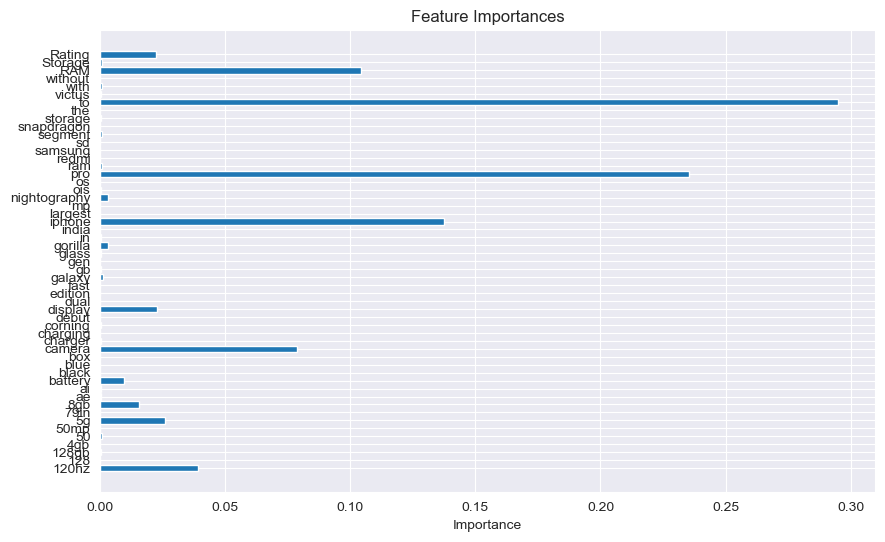

In [28]:
features = X_train.columns
importances = best_rf.feature_importances_

plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.show()


In [29]:
import os
print(os.path.exists("mobile_price_model.pkl"))  # Should return True


True
